# Comparison of Integration Methods 
Comparing simple algorithms

## For the Mechanical Chaotic Oscillator
```
Michael Huster
Duquesne University
profhuster@gmail.com
2019-07-07
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import solve_ivp
%matplotlib inline

In [2]:
# From https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples
def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num, figsize=(12,6))
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'b,')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()
    return fig

# MCO - Mechanical Chaotic Oscillator
## Numerical Integration

The Newton's Second Law equation of motion are

$$
\omega_{\phi} = \dot{\phi}
$$

and

$$
\dot{\omega}_{\phi} = \frac{\mu}{I}\left [ B_{field} \sin \phi + 
B_{drive} \cos \phi \sin \omega_d t \right ] - \frac{\beta 
\omega_{\phi}}{I}
$$

I define $\omega_0^2 = \frac{\mu B_{field}}{I}$, $b = \frac{B_{drive}}{B_{field}}$ and 
$\gamma = \frac{\beta}{I}$,
then the equation of the MCO can be written

$$
\dot{\omega}_{\phi} = \omega_0^2 \left [
\sin \phi + b \cos \phi \sin \omega_d t \right ] 
- \gamma \omega_{\phi}
$$

# Global Integration Parameters

In [27]:
nPoints = 30 * 640
DT = 0.01
DT2 = DT * DT
PHI0 = 1.01 * np.pi

# Globals
OMEGA_0 = 1.0
OMEGA_0_SQ = OMEGA_0**2
b = 0.0
OMEGA_D = 0.9 * OMEGA_0
GAMMA = 0.0

# Euler Integration

In [19]:
def euler(i, y, t):
    acc = OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i])) - GAMMA * y[1,i]
    y[0,i+1] = y[0,i] + y[1,i] * DT
    y[1,i+1] = y[1,i] + acc * DT

CPU times: user 688 ms, sys: 100 ms, total: 789 ms
Wall time: 376 ms


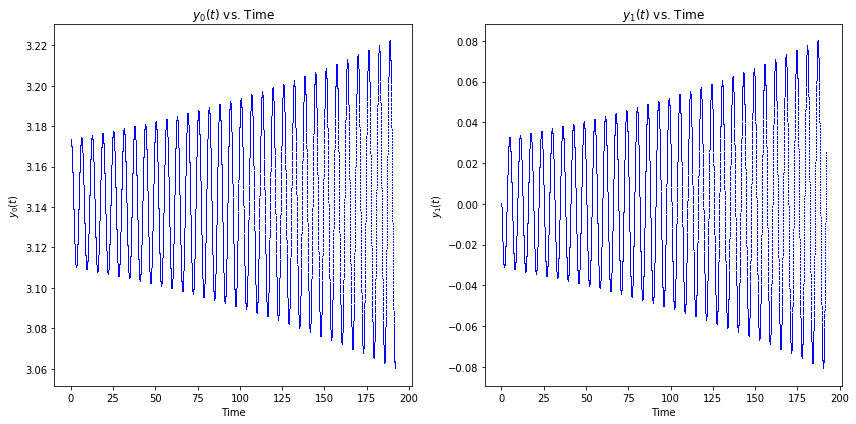

In [28]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])
y = np.zeros((2,nPoints), dtype='float64')
y[0,0] = yinit[0]
y[0,1] = yinit[1]

# Run
for i in range(nPoints-1):
    euler(i, y, t)
# Plot
fig = state_plotter(t, y, 1)
fig.savefig("MCO_Int2_Eu1.png")

# Phase Plot

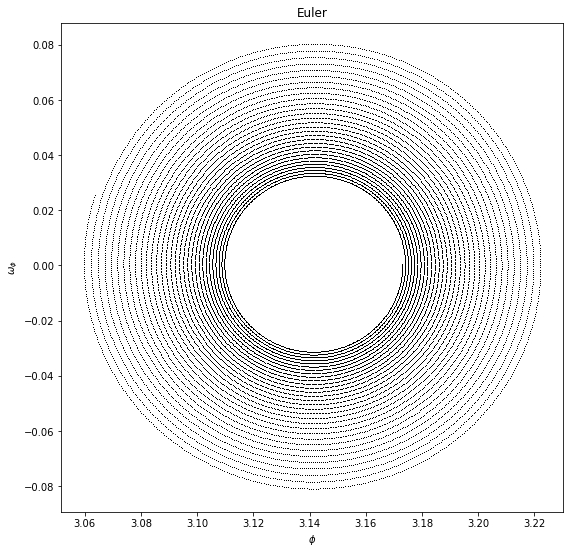

In [29]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0]%(2*np.pi), y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Euler")
fig.savefig("MCO_Int2_Eu2.png")

# Symplectic Euler Integration

In [22]:
def symEuler(i, y, t):
    y[1,i+1] = (y[1,i] + \
                DT * OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i]))) / \
                (1.0 + DT * GAMMA)
    y[0,i+1] = y[0,i] + y[1,i+1] * DT

CPU times: user 680 ms, sys: 97.5 ms, total: 778 ms
Wall time: 373 ms


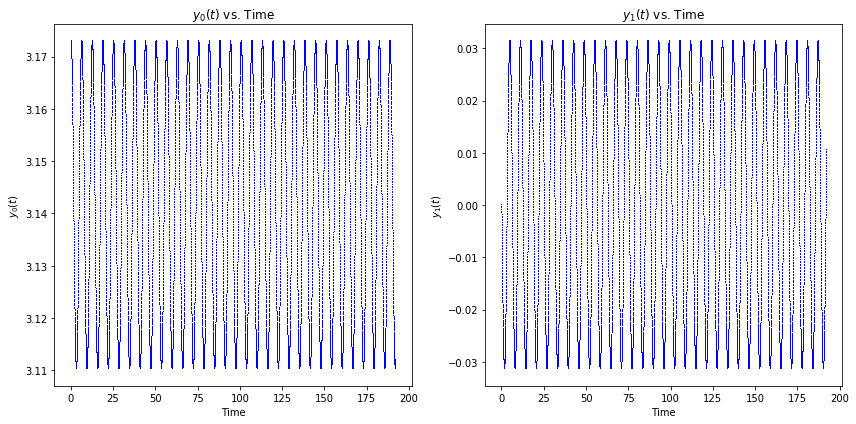

In [30]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])
y = np.zeros((2,nPoints), dtype='float64')
y[0,0] = yinit[0]
y[0,1] = yinit[1]

# Run
for i in range(nPoints-1):
    symEuler(i, y, t)
# Plot
fig = state_plotter(t, y, 1)
fig.savefig("MCO_Int2_SymEu1.png")

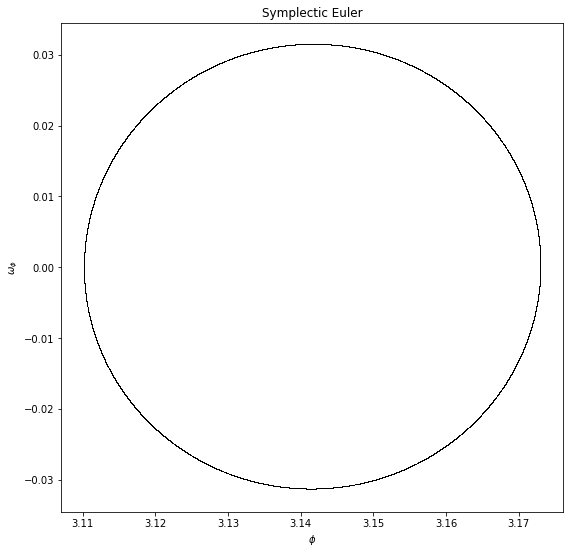

In [31]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0]%(2*np.pi), y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Symplectic Euler")
fig.savefig("MCO_Int2_SymEu2.png")

# Adjoint Symplectic Euler Integration

In [10]:
def adjSymEuler(i, y, t):
    y[0,i+1] = y[0,i] + y[1,i] * DT
    acc = OMEGA_0_SQ * (np.sin(y[0,i+1]) + b * np.cos(y[0,i+1]) * np.sin(OMEGA_D * t[i+1])) - GAMMA * y[1,i]
    y[1,i+1] = y[1,i] + acc * DT

CPU times: user 700 ms, sys: 103 ms, total: 803 ms
Wall time: 386 ms


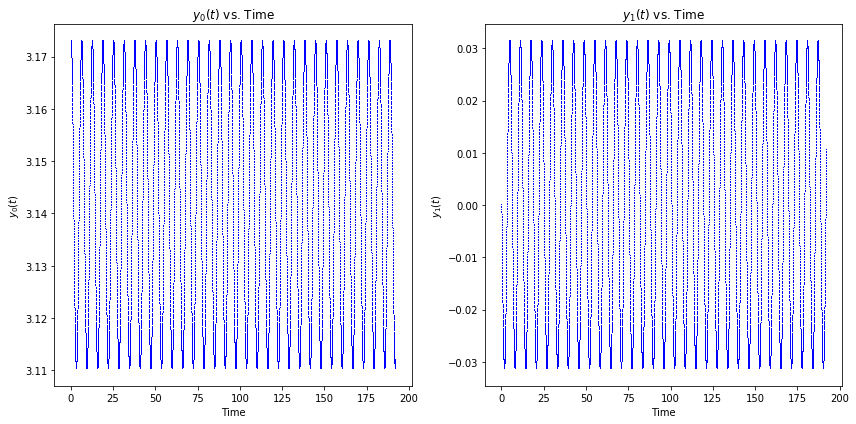

In [36]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])
y = np.zeros((2,nPoints), dtype='float64')
y[0,0] = yinit[0]
y[0,1] = yinit[1]

# Run
for i in range(nPoints-1):
    adjSymEuler(i, y, t)
# Plot
fig = state_plotter(t, y, 1)
fig.savefig("MCO_Int2_AdjSymEu1.png")

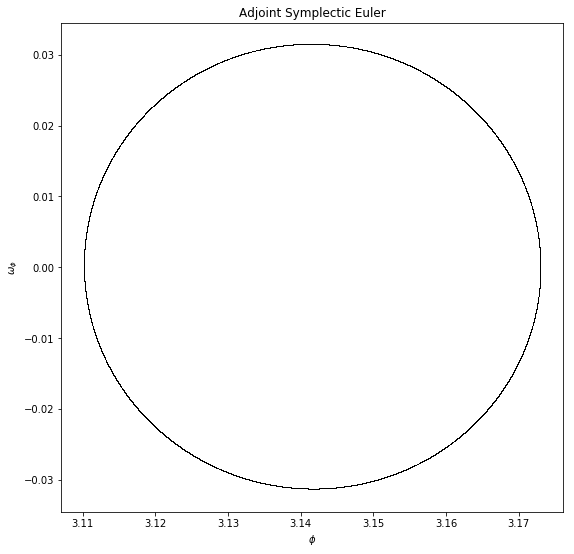

In [37]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0]%(2*np.pi), y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Adjoint Symplectic Euler")
fig.savefig("MCO_Int2_AdjSymEu2.png")